# Data Mining Versuch Verkehrsschilderkennung mit Neuronalen Netzen

* Autor: Prof. Dr. Johannes Maucher
* Datum: 14.11.2019

# Einführung

In diesem Versuch soll ein Convolutional Neural Network (CNN) für die Erkennung von Verkehrschildern implementiert, trainiert, evaluiert und getestet werden. Als Eingabe erhält das neuronale Netz Bilder von deutschen Verkehrsschildern. Ausgabe ist der Typ des Verkehrsschilds. Für Training und Test sind die Verkehrsschildbilder schon in separate Verzeichnissen abgelegt. Neben den Bildern selbst, enthält das zu diesem Versuch gehörende Datenverzeichnis auch Dateien mit Metadaten, die z.B. Bildeigenschaften, Verkehrsschildbedeutungen und die zugehörigen Klassenlabel beschreiben.

## Lernziele:
In diesem Versuch sollen Kenntnisse in folgenden Themen vermittelt werden:

* Convolutional Neural Networks (CNNs)
* Implementierung Tiefer Neuronaler Netze mit Tensorflow und Keras: 
    - Definition der Netzarchitektur
    - Training
    - Evaluation und Test
    
* Einfache Methoden der Bildverarbeitung:
    - Augmentierung
    - Kontrastverstärkung

* Evaluation eines Klassifikators


## Vorbereitung

### Grundlagen Neuronale Netze
Machen Sie sich mit den [Grundlagen herkömmlicher Neuronaler Netze (KI Vorlesung)](https://gitlab.mi.hdm-stuttgart.de/maucher/KI/blob/master/Slides/09_PartLernen4.pdf) und den [Grundlagen Convolutional Neural Networks ((KI Vorlesung))](https://gitlab.mi.hdm-stuttgart.de/maucher/KI/blob/master/Slides/V11DeepLearningKIversion.pdf) vertraut.


### Implementierung Neuronaler Netze mit Tensorflow und Keras
Machen Sie sich mit der Implementierung von Neuronalen Netzen mit Tensorflow und Keras vertraut. Z.B. mit den [Tensorflow Quickstart Tutorials](https://www.tensorflow.org/tutorials/quickstart/beginner)

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
#drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
 cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/.shortcut-targets-by-id/1yHcauYAFR9wD5O_2_jLUbkgxOwcTrIcc/Colab Notebooks


# Durchführung

## Vorbereitende Untersuchungen
1. Importieren Sie ein Bild aus dem Verzeichnis `Train` mit der [scikit-image.io](https://scikit-image.org/docs/dev/api/skimage.io.html)-Methode `imread()` und zeigen Sie dieses mit der Methode `imshow()` an. Geben Sie die Größe des Bildes aus (Attribut `.shape`). 

In [ ]:
from os.path import isdir,join,normpath
from os import listdir
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as mplimg
from skimage import io
from skimage.transform import resize
from skimage.exposure import equalize_adapthist
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import sys
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import model_from_json
from sklearn import metrics

tf.__version__

'2.2.0'

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
np.set_printoptions(threshold=sys.maxsize)

def parseDirectory(directoryName,extension):
    '''This method returns a list of all filenames in the Directory directoryName. 
    For each file the complete absolute path is given in a normalized manner (with 
    double backslashes). Moreover only files with the specified extension are returned in 
    the list.
    '''
    if not isdir(directoryName): return
    imagefilenameslist=sorted([
        normpath(join(directoryName, fname))
        for fname in listdir(directoryName)
        if fname.lower().endswith('.'+extension)            
        ])
    return imagefilenameslist

trainData = parseDirectory("./data/Train/0","png")
#\traffic-sign-recognition\data\Train\0
display(trainData)

['data/Train/0/00000_00000_00000.png',
 'data/Train/0/00000_00000_00001.png',
 'data/Train/0/00000_00000_00002.png',
 'data/Train/0/00000_00000_00003.png',
 'data/Train/0/00000_00000_00004.png',
 'data/Train/0/00000_00000_00005.png',
 'data/Train/0/00000_00000_00006.png',
 'data/Train/0/00000_00000_00007.png',
 'data/Train/0/00000_00000_00008.png',
 'data/Train/0/00000_00000_00009.png',
 'data/Train/0/00000_00000_00010.png',
 'data/Train/0/00000_00000_00011.png',
 'data/Train/0/00000_00000_00012.png',
 'data/Train/0/00000_00000_00013.png',
 'data/Train/0/00000_00000_00014.png',
 'data/Train/0/00000_00000_00015.png',
 'data/Train/0/00000_00000_00016.png',
 'data/Train/0/00000_00000_00017.png',
 'data/Train/0/00000_00000_00018.png',
 'data/Train/0/00000_00000_00019.png',
 'data/Train/0/00000_00000_00020.png',
 'data/Train/0/00000_00000_00021.png',
 'data/Train/0/00000_00000_00022.png',
 'data/Train/0/00000_00000_00023.png',
 'data/Train/0/00000_00000_00024.png',
 'data/Train/0/00000_0000

(30, 29, 3)


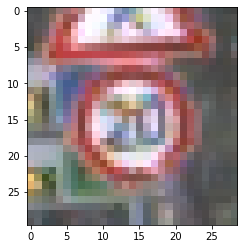

In [ ]:
picture = io.imread(trainData[0])
plt.imshow(picture)
print(picture.shape)
plt.show()

2. Verändern Sie die Größe des Bildes mit der [scikit-image.transform](https://scikit-image.org/docs/dev/api/skimage.transform.html)-Methode `resize()` auf eine Größe von $32x32x3$. Die Verzerrung des Seitenverhältnisses kann dabei ignoriert werden.

(32, 32, 3)


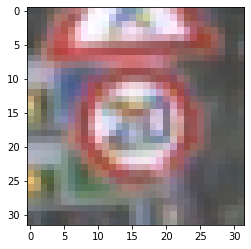

In [ ]:
picture = resize(picture, (32,32,3))
plt.imshow(picture)
print(picture.shape)
plt.show()

3. Führen Sie mit der [scikit-image.exposure](https://scikit-image.org/docs/dev/api/skimage.exposure.html)-Methode `equalize_adapthist()` eine Kontrastverstärkung des Bildes durch. Zeigen Sie das vergrößerte und kontrastangereicherte Bild an. **Anmerkung:** Das kontrastverstärkte Bild sieht zwar schöner aus. Auf der Basis kontrastverstärkter Bilder läßt sich aber im allgemeinen die Objekterkennung verbessern.

(32, 32, 3)


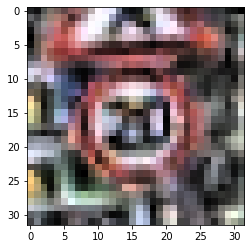

In [ ]:
picture = equalize_adapthist(picture)
plt.imshow(picture)
print(picture.shape)
plt.show()

Menschen können Objekte basierend auf deren High-Level, bzw. abstrakten Merkmale wiedererkennen. Dieses Prinzip verfolgt auch die Anwendung einer Kette von Filtern zur Merkmalsextraktion (Feature Extraction) bei der Objekterkennung: Diese sind beispielsweise Unschärfe/Entgratung - Kantenerkennung - Keypoint-Erkennung.

4. Importieren Sie die Datei `Train.csv` und machen Sie sich mit deren Inhalt vertraut. Die Datei `Test.csv` ist gleich strukturiert, bezieht sich aber auf die Bilder im Verzeichnis `Test`. Wieviele Zeilen enthalten die Dateien?

In [ ]:
df_train = pd.read_csv("./data/Train.csv")
df_train.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
df_test = pd.read_csv("./data/Test.csv")
df_test.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png
2,48,52,6,6,43,47,38,Test/00002.png
3,27,29,5,5,22,24,33,Test/00003.png
4,60,57,5,5,55,52,11,Test/00004.png


In [ ]:
print('Die Datei "Train.csv" hat', len(df_train) , 'Zeilen')
print('Die Datei "Test.csv" hat', len(df_test) , 'Zeilen')

Die Datei "Train.csv" hat 39209 Zeilen
Die Datei "Test.csv" hat 12630 Zeilen


5. Importieren Sie die Datei `signnames.csv` und machen Sie sich mit deren Inhalt vertraut. 

In [ ]:
df_signnamees = pd.read_csv("./data/signnames.csv")
df_signnamees.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


## Funktion für den Import aller Trainings- bzw. Testbilder
Schreiben Sie eine Funktion mit folgenden Eigenschaften:
* Der Funktion wird der Name der Datei übergeben, in welcher die Metadaten stehen, also entweder `Train.csv` oder `Test.csv`.
* Rückgabewerte der Funktion sind 
    * ein 4-dimensionales numpy-array, das alle Bilder des jeweiligen Verzeichnisses (Training oder Test) enthält.
    * ein 1-dimensionales numpy-array, das die Klassenlabel aller Bilder enthält.
* Die Bilder müssen alle auf eine Größe von $32x32x3$ skaliert werden (wie in der Vorbereitungsaufgabe).
* Für alle Bilder ist eine Kontrastverstärkung durchzuführen (wie in der Vorbereitungsaufgabe).

**Tipps für die Implementierung dieser Funktion:**

Iterieren Sie mit einer for-Schleife über alle Zeilen des metadaten-Files. Pro Iteration kann dann 
* der vollständige Verzeichnis- und Filenamen ausgelesen werden,
* das entsprechende Bild mit `imread()` eingelesen werden,
* das Bild auf die vorgegebene Größe angepasst werden,
* der Kontrast des Bildes verstärkt werden.

**Wichtig:** In den von der Funktion zurückgegebenen Arrays, dürfen die Bilder nicht wie in der ursprünglichen Reihenfolge im Dateiverzeichnis enthalten sein. Um sicherzustellen, dass beim Training jedes Minibatch möglichst viele verschiedene Klassen enthält, muss die Reihenfolge geshuffelt werden. Am einfachsten ist es, wenn gleich die Zeilen des Metadatenfiles geshuffelt werden.

In [ ]:
def importPicture(fileName):
    data = pd.read_csv('./data/'+fileName, names=['Width','Height','Roi.X1','Roi.Y1','Roi.X2','Roi.Y2', 'ClassId', 'Path'], skiprows=1)
    data = shuffle(data) #Reihenfolge randomisieren
    #display(data)
    data = data.reset_index(drop=True)
    classId_array = np.zeros((len(data)))
    picture_array = np.zeros(((len(data)), 32,32,3))
    for row in data.itertuples():
        if (row[0] % 1000 == 0):
            print("index: ", row[0])
        path = data.loc[row[0], "Path"] #Dateinamen auslesen
        picture = io.imread("data/"+str(path)) #Bild einlesen
        picture = resize(picture, (32,32,3)) #auf 32x32x3 skalieren
        picture = equalize_adapthist(picture) #kontrastvergrößerung
        
        picture_array[row[0]] = picture
        
        classId_array[row[0]] = row[7] 
        
    return picture_array, classId_array, data 

## Laden und Vorverarbeiten der Trainings- und Testdaten
1. Laden Sie mit der in der vorigen Teilaufgabe implementierten Funktion alle Trainingsbilder (`trainX`), Trainingslabel (`trainY`), Testbilder (`testX`) und Testlabel (`testY`)

In [ ]:
trainX, trainY, dataTrain = importPicture("Train.csv")
testX, testY, dataTest = importPicture("Test.csv")

index:  0


KeyboardInterrupt: ignored

In [ ]:
#save trainX, trainY, testX and testY in csv
np.save("trainX", trainX)
np.save("trainY", trainY)
np.save("dataTrain", dataTrain)
np.save("testX", testX)
np.save("testY", testY)
np.save("dataTest", dataTest)

In [ ]:
#read trainX, trainY, testX and testY from csv
trainX = np.load("trainX.npy")
trainY = np.load("trainY.npy")
testX = np.load("testX.npy")
testY = np.load("testY.npy")

2. Bestimmen Sie die Häufigkeitsverteilung der Klassen in den Trainings- und Testdaten. Visualisieren Sie diese.

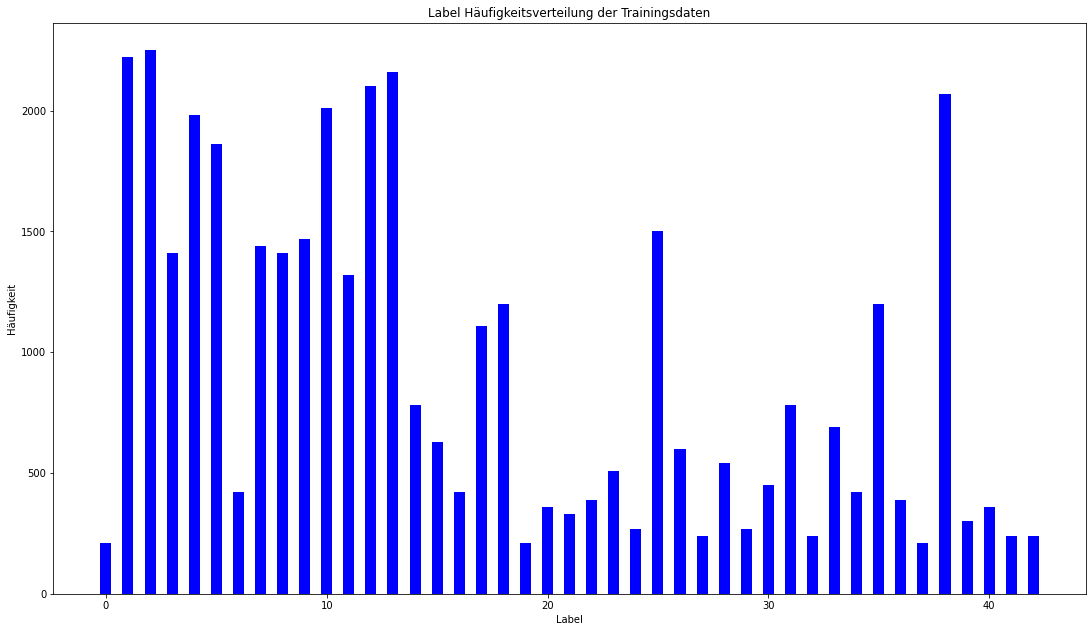

In [ ]:
x1 = []
y1 = []
index = 0
width = 0.5

for i in df_train['ClassId'].value_counts().index:
    x1.append(i)
    y1.append(df_train['ClassId'].value_counts().values[index])
    index = index+1
    
fig = plt.figure(figsize=(15,8))
plt.xlabel('Label' , fontsize=10)
plt.ylabel('Häufigkeit', fontsize=10)
plt.title("Label Häufigkeitsverteilung der Trainingsdaten")
fig.set_size_inches(18.5, 10.5)
plt.bar(x1, y1, width, color='b' )
plt.show()

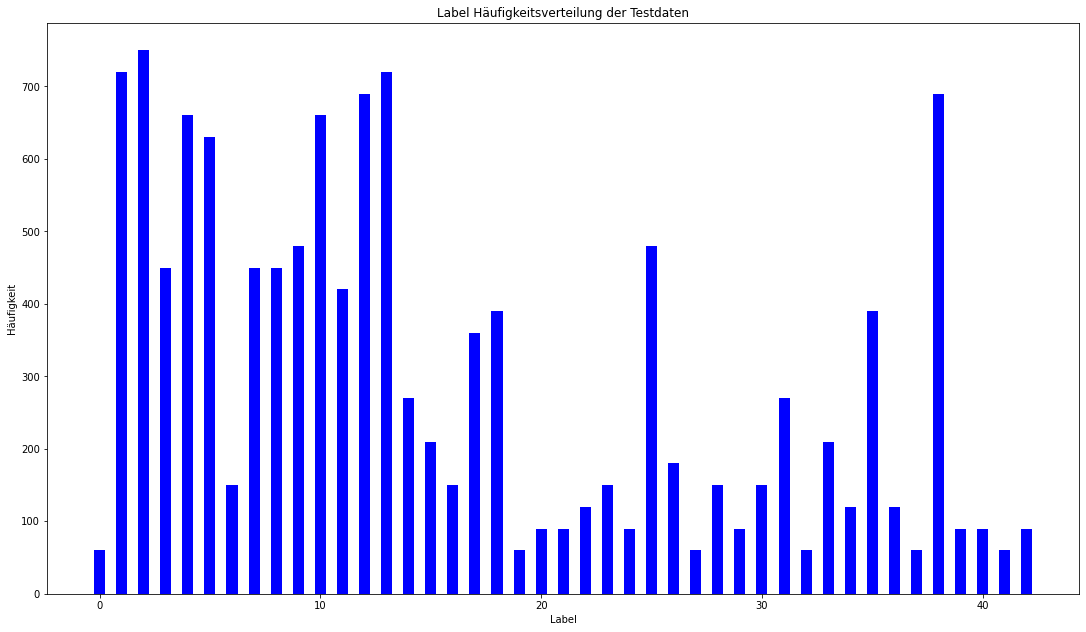

In [ ]:
x2 = []
y2 = []
index = 0

for i in df_test['ClassId'].value_counts().index:
    x2.append(i)
    y2.append(df_test['ClassId'].value_counts().values[index])
    index = index+1

fig = plt.figure(figsize=(15,8))
plt.xlabel('Label' , fontsize=10)
plt.ylabel('Häufigkeit', fontsize=10)
plt.title("Label Häufigkeitsverteilung der Testdaten")
fig.set_size_inches(18.5, 10.5)
plt.bar(x2, y2, width, color='b' )
plt.show()

In [ ]:
verteilung_test_train = {}

for index in range(len(y1)):
    verteilung_test_train[x1[index]] = (y2[index]*100/y1[index])

print("Verhältnis der Testdaten in Prozent pro Klasse, im Vergleich zu den Traingingsdaten: \n")
for key in sorted(verteilung_test_train):
    print ("%s: %s" % (key, verteilung_test_train[key]))

Verhältnis der Testdaten in Prozent pro Klasse, im Vergleich zu den Traingingsdaten: 

0: 28.571428571428573
1: 32.432432432432435
2: 33.333333333333336
3: 31.914893617021278
4: 33.333333333333336
5: 33.87096774193548
6: 35.714285714285715
7: 31.25
8: 31.914893617021278
9: 32.6530612244898
10: 32.83582089552239
11: 31.818181818181817
12: 32.857142857142854
13: 33.333333333333336
14: 34.61538461538461
15: 33.333333333333336
16: 28.571428571428573
17: 32.432432432432435
18: 32.5
19: 28.571428571428573
20: 25.0
21: 27.272727272727273
22: 30.76923076923077
23: 29.41176470588235
24: 33.333333333333336
25: 32.0
26: 30.0
27: 25.0
28: 27.77777777777778
29: 33.333333333333336
30: 33.333333333333336
31: 34.61538461538461
32: 37.5
33: 30.478955007256893
34: 35.714285714285715
35: 32.5
36: 30.76923076923077
37: 28.571428571428573
38: 33.333333333333336
39: 30.0
40: 25.0
41: 25.0
42: 25.0


#### Übersicht der Verteilung von Trainings- und Testdaten je Klasse

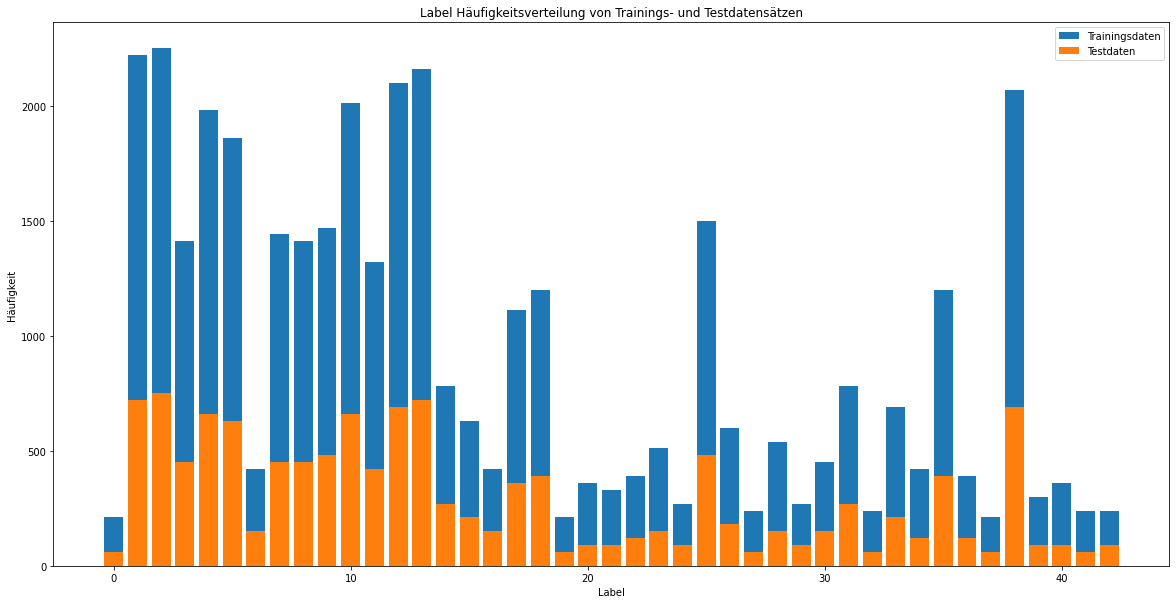

In [ ]:
fig = plt.figure(figsize=(20,10))
unique, trainVerteilung = np.unique(df_train['ClassId'], return_counts=True)
plt.bar(unique, trainVerteilung)
unique, testVerteilung = np.unique(df_test['ClassId'], return_counts=True)
plt.bar(unique, testVerteilung)

plt.title('Label Häufigkeitsverteilung von Trainings- und Testdatensätzen')
plt.xlabel('Label')
plt.ylabel('Häufigkeit')
plt.legend(['Trainingsdaten', 'Testdaten'], loc='upper right')
plt.show()

**Häufigkeitsverteilung**:

Der im oberen Bereich dargestellte blaue Bar-Plot ist die Verteilung der Trainingsdaten, der orange Bar-Plot bildet im Vergleich die Anzahl der Testdaten ab. Dabei ist ersichtlich, dass das Verhältnis der Verteilung bei beiden Datensätzen je Klassenlabel, gemäß einem Schema von ca. 70% zu 30% (Trainingsdaten:Testdaten) ähnlich ausfällt. Bei der Berechnung des Verhältnisses von Test- zu Trainingsdaten wird dies auch deutlich. Es gibt pro Klasse immer ca. 25-35% Testdaten.

Zudem ist die Verteilung der einzelnen Klassen nicht ausgewogen. Es lässt sich deutlich erkennen, dass ein Klassenlabel eine deutlich größere Häufigkeit hat als ein anderes Klassenlabel. Zum Beispiel gibt es auffällig viele Trainingsbilder (Häufigkeit > 2000) der Klasse eins, zwei, zehn, 12, 13 und 38, und sehr wenige dagegen für das Label der  Klasse 0, 6, 19, 24, 27, 29, 32, 38, sowie 39 bis 24 in den Traininsdaten. Das gleiche Schema kann man bei den Testdaten erkennen. 

Aus diesem Grund kann man hier insgesamt sagen, dass die Klassen unausgewogen sind oder einen "Bias" gegenüber den dominanten Klassen haben. Während eine hohe Klassen Unausgeglichenheit in vielen natürlichen, bzw. realen Szenarien vorkommt, erhöht dies jedoch die Schwierigkeit einer guten Abstraktion, da die Mindherheit-Klasse komplett ignoriert werden könnte. Das heißt, wenn innerhalb der Trainingsdaten ein Ungleichgewicht zwischen den Klassen besteht, werden die Lernenden die Mehrheitsgruppe aufgrund ihrer erhöhten Wahrscheinlichkeit übermäßig häufig klassifizieren. Infolgedessen werden die Instanzen, die der Minderheitsgruppe angehören, häufiger falsch klassifiziert als die der
Mehrheitsgruppe. Dies kann sich auch negativ auf die Güte des Modells, d.h. dessen Fähigkeit korrekt zu abstrahieren, auswirken. Ebenso wird die Bewertung mittels Accuracy in solch einem Fall schwieriger. 



3. Die Pixelwerte aller Bilder sind Integer zwischen 0 und 255. Transformieren Sie Trainings- und Testbilder so, dass die Werte Floats im Bereich zwischen 0 und 1 sind. Hierfür kann das gesamte 4-dimensionale Array durch 255 geteilt werden.

Die Werte liegen Bereits zwischen 0 und 1. Ein Teilen durch 255 zur Normalisierung ist damit nicht notwendig

In [ ]:
print("min Wert von Train: ", trainX.min())
print("max Wert von Train: ", trainX.max())

min Wert von Train:  0.0
max Wert von Train:  1.0


In [ ]:
print("min Wert von Test: ", testX.min())
print("max Wert von Test: ", testX.max())

min Wert von Test:  0.0
max Wert von Test:  1.0


4. Alle Labels, sowohl der Trainings- als auch der Testdaten müssen One-Hot-encodiert werden.

In [ ]:
from keras.utils import to_categorical

trainEncode = to_categorical(trainY)
print('Original train label[0] : ', trainY[0])
print('After conversion to categorical ( one-hot ) : ', trainEncode[0])

Original train label[0] :  18.0
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
testEncode = to_categorical(testY)
print('Original test label 0 : ', testY[0])
print('After conversion to categorical ( one-hot ) : ', testEncode[0])

Original test label 0 :  12.0
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Definition der CNN Architektur
Schreiben Sie eine Funktion `generateCNN(width, height, depth, classes)` die eine Keras CNN-Architektur zurück gibt. Für die Definition der Architektur werden dieser Funktion die Parameter:

* `width`: Breite der Bilder
* `height`: Höhe der Bilder
* `depth`: Anzahl der Kanäle pro Bild
* `classes`: Anzahl der unterschiedlichen Klassen

übergeben. Die in der Funktion zu implementierende Architektur ist im folgenden Bild dargestellt.

<img src="https://maucher.home.hdm-stuttgart.de/Pics/cnnTrafficSign.png" style="width:700px" align="middle">

In [ ]:
def generateCNN (width, height, depth, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(8, input_shape=(width,height,depth), data_format="channels_last", kernel_size=(5,5), padding="same"))  
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(layers.Conv2D(16, data_format="channels_last", kernel_size=(3,3), padding="same")) 
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(16, data_format="channels_last", kernel_size=(3,3), padding="same")) 
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(layers.Conv2D(32, data_format="channels_last", kernel_size=(3,3), padding="same")) 
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, data_format="channels_last", kernel_size=(3,3), padding="same")) 
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
    model.add(layers.Flatten(data_format=None))
    model.add(layers.Dense(128, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5, noise_shape=None, seed=None))  #Dropwert veränderbar
    model.add(layers.Dense(128, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
    model.add(layers.Activation('relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5, noise_shape=None, seed=None))  #Dropwert veränderbar
    model.add(layers.Dense(43, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None))
    model.add(layers.Activation('softmax'))
    
    return model

## Training des CNN
Rufen Sie die im vorigen Abschnitt implementierte Funktion `generateCNN()` auf und weisen Sie die von der Funktion zurückgegebene Architektur der Variablen `model` zu. Durch Aufruf der Funktion `model.summary()` erhalten Sie eine Übersicht des erzeugten Netzes.

Für das Training soll der `Adam`-Algorithmus aus dem Modul `tensorflow.keras.optimizers` benutzt werden. `Adam` implementiert ein *Stochastic Gradient Descent*-Lernverfahren, welches die Lernraten für die Gewichte individuell und dynamisch anpasst.

In den folgenden zwei Codezellen, werden die Trainingsparameter konfiguriert:

In [ ]:
model = generateCNN(32,32,3, 43)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 8)         608       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 8)         32        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_17 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 16, 16, 16)       

### Architektur des CNN

Die Werte, der durch die Funktion generateCNN implementierten Architektur, stimmen mit denen der vorgegebenen Architektur überein und liefern eine gute Übersicht über die Architektur des CNN Modells. Diese ist aufgetrennt in zwei Bereiche:
1. General Purpose (Feature Extraction) mit Convolutional- und Max-Pooling Layern.
2. Application Specific (Classifier) mit Classifier und Dense Layern. 

Durch diese Aufteilung wird ermöglicht dass der Classifier gute, d.h. möglichst informative Eingabemerkmale erhält. Hierdurch kann dieser viel besser klassifizieren, als wenn man diesem nur „rohen“ Daten geben würde. Die Neuronen in der ersten Schicht lernen sehr einfache Strukturen und je weiterer Schicht werden die Merkmale immer komplexer. Das heißt, Schicht für Schicht werden immer bessere Merkmale gelernt. 

Auffällig ist, dass selbst bei den Dense Layern die Anzahl an lernbaren Parametern sehr gering mit nur 16.512 Parametern liegt. Dies liegt unter anderem daran, dass die Input Daten bereits eine sehr geringe Größe von nur 32x32 Pixeln haben. Hinzu kommt, dass durch das Anwenden von Filtern in den Convolutional Layern die Anzahl der Parameter zusätzlich verringert wird. Über den ganzen Bereich der dem Feature Extraction dient hinweg wird eine Art Trichter gebildet. Die Output Größe verkleinert sich von 32x32 Pixeln auf eine Größe von 4x4 Pixeln. 

In [ ]:
NUM_EPOCHS = 15 # Number of training epochs 
INIT_LR = 1e-3 # Initial Learning Rate for ADAM training
BS = 64 # Size of minibatches

In [ ]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / (NUM_EPOCHS * 0.5)) 
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

Für das Training sollen nicht nur die vorhandenen Trainingsbilder eingesetzt werden, sondern zusätzlich Bilder die Augmentierungen der Trainingsbilder sind. Augmentierte Bilder können mit dem `ImageDataGenerator` des Moduls `tensorflow.keras.preprocessing.image` erzeugt werden. Der Code für die Erzeugung des in diesem Projekt eingesetzten Objekts ist unten gegeben. 

In [ ]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=10, #Winkel von 10° für zufällige Rotationen
    zoom_range=0.15, #Bild wird gezoomed mit den Zoomfaktoren 0.85 bis 1.15.
    width_shift_range=0.1, #Bild wird zufällig horizontal verschoben
    height_shift_range=0.1, #Bild wird zufällig vertikal verschoben
    shear_range=0.15, #Bild wird mit einer Schiefe (15% drehung gegen den Uhrzeigersinn) versehen
    horizontal_flip=False, #Kein Umdrehen des Bildes auf der x-Achse
    vertical_flip=False, #Kein Umdrehen des Bildes auf der y-Achse
    fill_mode="nearest") #beim Augmentieren neue erzeugte Bildpunkte, übernehmen die selben Eigenschaften der nächsten Randbildpunkte.
    

**Aufgabe:** Erklären Sie was in dieser Codezelle definiert wird.

Erläuterung ImageDataGenerator:

- rotation_range=10 - der Winkel von 10° wird für eine zufällige Rotationen gewählt
- zoom_range=0.15 - das Bild wird gezoomed mit den Zoomfaktoren 0.85 bis 1.15.
- width_shift_range=0.1 - das Bild wird zufällig um 0.1 horizontal verschoben
- height_shift_range=0.1 - das Bild wird zufällig um 0.1 vertikal verschoben
- shear_range=0.15- das Bild wird mit einer Schiefe (15% drehung gegen den Uhrzeigersinn) gekippt. 
- horizontal_flip=False - Kein Umdrehen des Bildes auf der x-Achse
- vertical_flip=False - Kein Umdrehen des Bildes auf der y-Achse
- fill_mode="nearest" - beim Augmentieren neue erzeugte Bildpunkte, übernehmen die selben Eigenschaften der nächsten Randbildpunkte.

Der Datengenerator selbst ist ein Iterator, der auf Anforderung Stapel (engl. Batches) von Bildproben zurückgibt. Die Augmentation der Trainingsdaten ermöglicht es, das trainierte Modell robuster zu machen. Ebenso kann die Möglichkeit des Overfitting so verringert werden. 

#### Augmentierte Bilddateien
Im Folgenden kann ein Beispiel an generierten, transformierten Bilddaten zur Übersicht eingesehen werden. 

Die Wirkung ist hier je nach Bildqualität anders. Ersichtlich ist auch, dass sich bei unterschiedlichen Bildern nach der Augmentation Bereiche entweder verdunkeln und erhellen.  Durch die Augmentation und Drehung wurd erzielt, dass das Modell Drehungen von Bildern besser handhaben kann. Dies wird erzielt, indem Bilder aus dem Datensatz während des Trainings künstlich und zufällig gedreht werden. Besonders bei rotationssymetrischen, geometrischen Objekten wie Verkehrszeichen kann eine solche Vorverarbeitung der Trainingsdaten einen interessanten Effekt auf die Qualität und Robustheit des trainierten Modells bieten. Das heißt, diese Transformation durch rotieren, verschieben, etc. könnte beim Lernen von Bilddateien hilfreich sein, bei denen die Objekte unterschiedliche Ausrichtungen haben können.

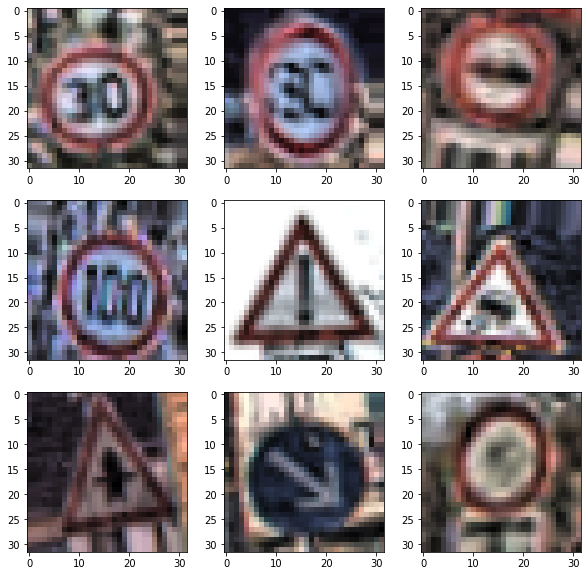

In [ ]:
# fit parameters from data
fig = plt.figure(figsize=(10,10))
aug.fit(trainX)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in aug.flow(trainX, trainEncode, batch_size=BS):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(32, 32, 3))
	# show the plot
	plt.show()
	break

    
Das Training wird mit folgender Codezelle ausgeführt.

**Aufgabe:** Erklären Sie die Argumente der Funktion `fit_generator()`. 

Erläuterung der Argumente für die Funktion fit_generator():

- aug.flow(): Generator, der mit Trainingsdaten und Trainingslabels gefüttert wird und aus diesen Batches generiert

- validation data: Testdaten mit denen der loss und die accuracy nach jeder Epoche errechnet wird.

- steps_per_epoch: Gibt die Anzahl an Batches an, die pro Epoche zum Trainieren verwendet werden.

- epochs: Integer, welcher die Anzahl an Epochen angibt, um das Modell zu trainieren. 

- class_weight: Durch Angabe einer classWeight kann der Lossfunktion eine Gewichtung der Klassen gegeben werden. Dadurch kann man dem Modell sagen, dass es den unterrepräsentierten Klassen "mehr Aufmerksamkeit" schenken soll.

- verbose: Gibt den Detailgrad an Feedback an, der beim Training ausgegeben wird. 0 = nichts, 1 = Fortschrittsbalken, 2 = eine Zeile pro Epoche. 

Hinweis: Bei neueren Versionen von > tensorflow 2.0 ist die Funktion fit_generator() deprecated.

Für die Ausführung der Zelle muss das numpy-Array `classWeight` angelegt sein. Sie enthält für jede Klasse den relativen Anteil dieser Klasse in den Trainingsbildern. Wenn z.B. 30% aller Trainingsdaten zur Klasse 0 gehören, dann hätte das erste Element in `classWeight` den Wert 0.3.

In [ ]:
def createClassWeight(trainVerteilung):
    display(trainY.size)
    return trainVerteilung/trainY.size
classWeight = createClassWeight(trainVerteilung)
display(classWeight)
print("Alle Werte des Arrays aufsummiert: ",sum(classWeight))

39209

array([0.00535591, 0.05661965, 0.05738478, 0.03596113, 0.05049861,
       0.04743809, 0.01071183, 0.03672626, 0.03596113, 0.03749139,
       0.05126374, 0.03366574, 0.05355913, 0.05508939, 0.01989339,
       0.01606774, 0.01071183, 0.02830983, 0.03060522, 0.00535591,
       0.00918157, 0.00841644, 0.0099467 , 0.01300722, 0.00688617,
       0.03825652, 0.01530261, 0.00612104, 0.01377235, 0.00688617,
       0.01147696, 0.01989339, 0.00612104, 0.0175725 , 0.01071183,
       0.03060522, 0.0099467 , 0.00535591, 0.052794  , 0.0076513 ,
       0.00918157, 0.00612104, 0.00612104])

Alle Werte des Arrays aufsummiert:  1.0


Bei einer Tensorflow Version ab 2.2 muss die Funktion createClassWeight mit dem folgendem Codeblock ersetzt werden. Grund dafür ist, dass bei der neueren Tensorflow Verison ein Dictionary erwartet wird, während bei der älteren ein numpy array erwartet wird.

In [ ]:
#from sklearn.utils import class_weight

#class_weights = class_weight.compute_class_weight('balanced', np.unique(trainY), trainY)
#classWeight= dict(enumerate(class_weights))

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', np.unique(trainY), trainY)
classWeight= dict(enumerate(class_weights))

In [ ]:
print("[INFO] training network...")
H = model.fit_generator(
    aug.flow(trainX, trainEncode, batch_size=BS),
    validation_data=(testX, testEncode),
    steps_per_epoch=trainX.shape[0] // BS,
    epochs=NUM_EPOCHS,
    class_weight=classWeight,
    verbose=1)

[INFO] training network...
Epoch 1/15
612/612 [==============================] - 21s 34ms/step - loss: 3.1038 - accuracy: 0.1871 - val_loss: 1.5996 - val_accuracy: 0.4778
Epoch 2/15
612/612 [==============================] - 20s 33ms/step - loss: 1.7588 - accuracy: 0.4191 - val_loss: 1.2682 - val_accuracy: 0.5678
Epoch 3/15
612/612 [==============================] - 20s 33ms/step - loss: 1.1949 - accuracy: 0.5657 - val_loss: 0.7787 - val_accuracy: 0.7364
Epoch 4/15
612/612 [==============================] - 20s 33ms/step - loss: 0.9109 - accuracy: 0.6585 - val_loss: 0.6394 - val_accuracy: 0.7831
Epoch 5/15
612/612 [==============================] - 20s 32ms/step - loss: 0.7288 - accuracy: 0.7203 - val_loss: 0.5140 - val_accuracy: 0.8356
Epoch 6/15
612/612 [==============================] - 20s 33ms/step - loss: 0.6042 - accuracy: 0.7676 - val_loss: 0.5262 - val_accuracy: 0.8387
Epoch 7/15
612/612 [==============================] - 20s 33ms/step - loss: 0.5261 - accuracy: 0.8011 - val_l

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
# save model
model.save("traffic_recognition.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


Visualisieren Sie die Entwicklung der *Accuracy* über dem Fortschritt der Trainingsepochen. Plotten Sie dabei die entsprechenden Kurven der Accuracy auf den Trainings- und auf den Testdaten in einen Graphen.

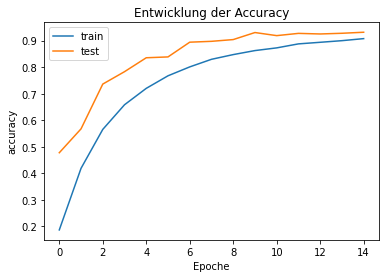

In [ ]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('Entwicklung der Accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoche')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Je größer die Anzahl an Epochen, desto besser wird auch die Accuracy des trainierten Modells. Ab der 6. Epoche erreicht das Modell eine zunehmende Verbesserung in dessen Accuracy ("elbow" der Kurve), welche sich ab der 14. Epoche zunehmend zu einer Gerade annähert und durch weiteres Training kaum noch verbessern lässt. Die durchschnittliche Klassifizierungsgenauigkeit des CNN-Modells für Straßenschilder kann mit der obigen Architektur eine Accuracy von 0.9077 oder 90.77% auf den Trainingsdaten und eine Accuracy von 0.9317 oder 93.17% auf den Trainingsdaten erreichen. Die Klassifizierungsgenauigkeit auf Testdaten ist dabei leicht besser (auch ersichtlich in der Grafik), als die Klassifizierungsgenauigkeit auf die Trainingsdaten. Normalerweise könnte man davon ausgehen, dass das Modell schlechter abschneidet bei der Klassifizierung von noch ungesehenen Testdaten. In diesem Fall ist dies jedoch anders herum. Man könnte auch hier auf die Unausgewogenheit der Trainingsdaten rückschließen.

## Evaluation des gelernten Modells

Wenden Sie das gelernte CNN an, um für alle Bilder des Testdatensatzes die Art des Verkehrsschildes zu bestimmen. Evaluieren Sie die Qualität des CNN indem Sie einen `classification_report()` aus dem Modul `sklearn.metrics` erzeugen. 

In [ ]:
#Anwendung des CNN auf alle Bilder des Testdatensatzes um die Art des Verkehrsschildes zu bestimmen.
predictions = model.predict(testX)
predictedLabels = np.argmax(predictions, axis=1)
trueLabels = testY.astype(int)

In [ ]:
report = metrics.classification_report(trueLabels, predictedLabels)
print(report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        60
           1       0.93      0.96      0.95       720
           2       0.79      0.98      0.88       750
           3       0.97      0.86      0.91       450
           4       0.99      0.92      0.95       660
           5       0.87      0.66      0.75       630
           6       0.98      0.89      0.93       150
           7       0.86      0.96      0.91       450
           8       0.96      0.92      0.94       450
           9       0.96      0.96      0.96       480
          10       0.98      0.96      0.97       660
          11       0.96      0.92      0.94       420
          12       0.99      0.99      0.99       690
          13       1.00      0.99      1.00       720
          14       0.98      1.00      0.99       270
          15       0.97      1.00      0.98       210
          16       0.99      0.99      0.99       150
          17       1.00    


#### Angewandte Metriken
3. Welche Metriken werden im Report angezeigt? Beschreiben Sie diese kurz?





Metriken: precision, recall, f1-score, support

- Precision: Die Precision ist das Verhältnis tp / (tp + fp), wobei tp die Anzahl der true positives und fp die Anzahl der false positives ist. Es beschreibt die Fähigkeit des Classifiers Samples, die negativ sind, nicht als positiv zu klassifizieren. Grob könnte man sagen, die Präzision ist ein Maß dafür, "wenn ein Modell eine Vorhersage macht, wie oft liegt es richtig?".

- Recall: Der Recall ist das Verhältnis tp / (tp + fn), wobei tp die Anzahl der true positives und fp die Anzahl der false positives ist. Es beschreibt die Fähigkeit des Classifiers alle positiven Samples zu finden. Grob könnte man auch sagen, der Recall/Rückruf ist ein Maß dafür, "hat das Modell jedes Mal eine Vorhersage gemacht, wenn es eine Vorhersage hätte machen sollen?

- F1-Score: Der F1-Score ist der Durchschnitt von Precision und Recall. Er kann einen Wert zwischen 0 und 1 annehmen.

- Support: Anzahl der Samples in der jeweiligen Klasse.



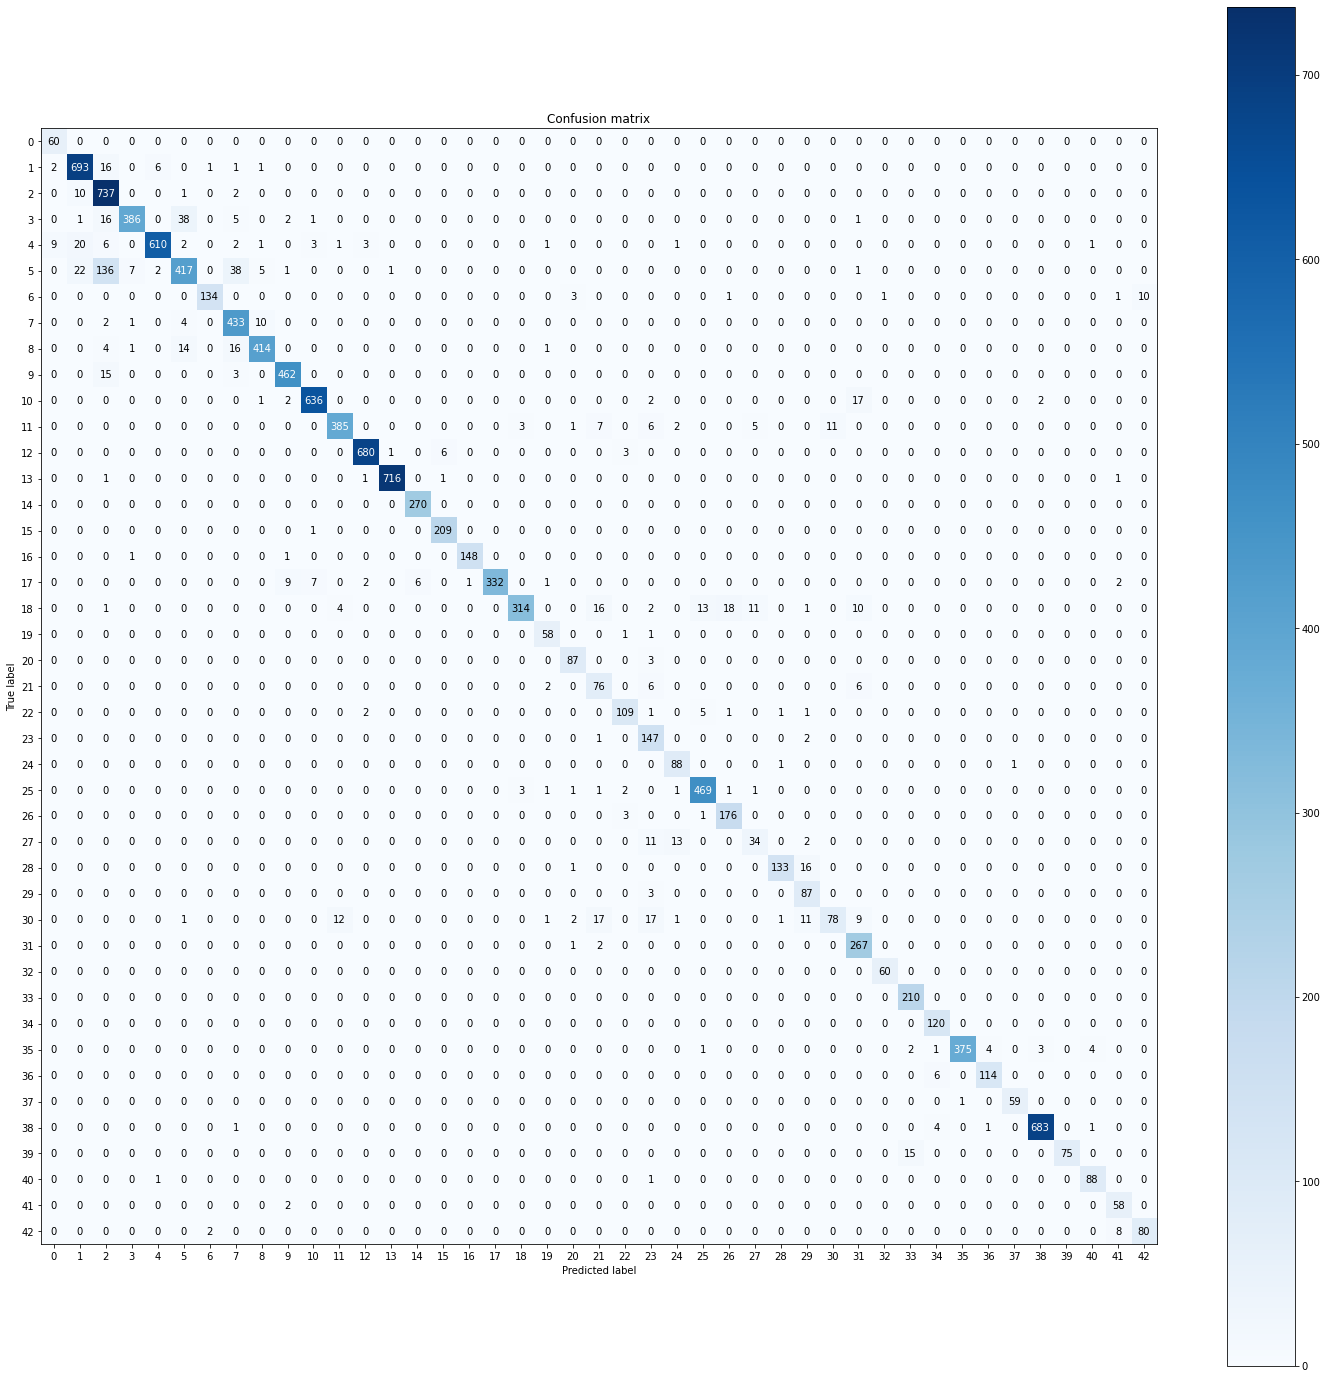

In [ ]:
import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    trueLabels, 
    predictedLabels,
    figsize=(25, 25),
    title="Confusion matrix")
plt.show()

#### Erkenntnisse aus der Klassifikationsgenauigkeit des CNNs

**Aufgabe** Diskussion der Klassifikationsgenauigkeit des CNN anhand des Reports: 

Verkehrszeichen-Erkennungssysteme stellen eine Schlüsselkomponente in trendigen realen Anwendungen dar, wie z.B. autonomes Fahren sowie Sicherheit und Assistenz des Fahrers. Dennoch ist eine große Schwierigkeit die Machine Learning Algorithmen auf alle möglichen, realen Szenarien zu trainieren. Diese Komplexität realer Gegebenheiten ist in den Trainingsdatenbildern nur gering abgedeckt. Neben geringer Bildqualität, ist auch ein deutlicher Bias zwischen den einzelnen Klassen ersichtlich, wodurch auch beim Testing mit ungesehenen Bilddaten eine Tendenz zu gewissen Majority-Klassen gegenüber Minority-Klassen zu erwarten ist.

Tendenziell ist die Genauigkeit des CNN Modells sehr gut, betrachtet man nur die hohen Accuracy-Werte. Allerdings fällt auf, dass manche Klassen mit hohem Recall eine geringere Precision haben. Dies macht auch Sinn, da man davon ausgehen kann, dass wenn alle bzw. viele positive Samples gefunden wurden, auch einige negative Samples dabei sind. Man könnte für diese Klassen mehr Bilder zum trainieren verwenden um die Genauigkeit gezielt zu verbessern. 

Betrachtet man zudem die Confusion-Matrix genauer, so sieht man dass die Klassenlabel, welche erhöht (siehe Grafik zur Häufigkeitsverteilung) unter den Trainingsdatensätzen vorkamen auch häufiger klassifiziert wurden (z.B. Label 38). Hier kann man davon ausgehen, dass durch Unausgewogenheit der Trainingsdaten auchd die Fähigkeit des CNN Modells zu Abstrahieren beeinträchtigt wurde und dieses gewisse Majority-Klassen gegenüber Minority-Klassen bevorzugt. 

#### Fehlklassifikationen

Zeigen Sie 5 Bilder an, die nicht korrekt klassifiziert wurden. Läßt sich die Fehlklassifikation erklären?

Falsch klassifizierte Bilder


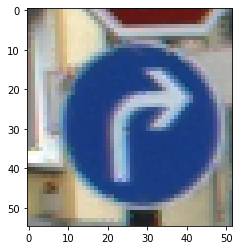

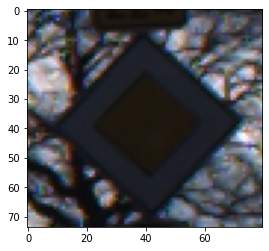

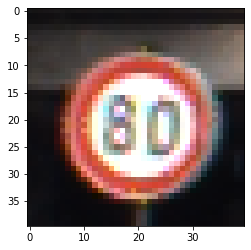

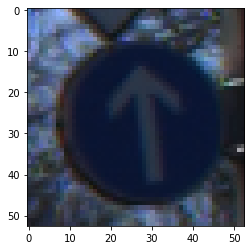

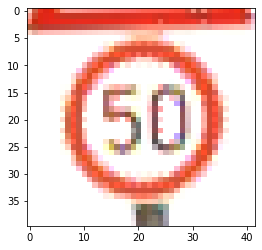

In [ ]:
def getWrongLabeledPic(trueLabels, predictedLabels, data):
    print("Falsch klassifizierte Bilder")
    wrongPicIndex = []
   
    for i in range (len(trueLabels)):
        if trueLabels[i] != predictedLabels[i]:          
            wrongPicIndex.append(i) 
    count = 0
    
    for j in wrongPicIndex:
        path = data.loc[j, "Path"]
        path1 = "./data/"+path
        picture = io.imread(path1)
        plt.imshow(picture)
        
        plt.show()
        count += 1
        if count > 4:
            break

getWrongLabeledPic(trueLabels, predictedLabels, df_test)

#### Erklärung für die Fehlklassifikation:

Die Testbilder sind von geringerer Qualität, d.h. diese sind oftmals sehr dunkel (Nachtbilder) und haben wenig Kontrast zur eindeutigen Klassifizierung bedeutender Merkmale. Darüber hinaus haben die Bilder teilweise eine sehr kleine Auflösung, welche dem Modell ebenso eine nur geringe Informationsqualität für eine Klassifkation bietet (Bild 2). Auch mit bloßem Auge ist dieses Bild nicht klassifizierbar.

Außerdem hat das Modell Schwierigkeiten beim Unterscheiden der Straßenschilder mit speed limits (Klasse 0 bis 9), da durch die geringe Qualität oftmals die Zahlen auf dem Schild nicht gut lesbar und somit falsch vom Modell erkannt werden. Zudem spielt auch hier ein, dass die Datensätze je Klassenlabel in ihrer Anzahl stark variieren. Die Label von 0-9 spiegeln auch in der Confusion-Matrix diese Tendenz wieder zu gewissen Klassenlabeln.  

Bei Bild 5 wird ein Schatten über die Hälfte des Schildes geworfen, dadurch konnte das CNN das Schild nicht richtig abgrenzen. Dies ist eine häufige Schwierigkeit, welche man bei dem Bereich der Computer Vision antrifft. Unter realen Verhältnissen sind trainierte Objekte oft schwer zu erkennen, da diese verschiedenen Lichtverhältnissen, Spiegelungen, Schatten, Wetter oder auch Verschmutzungen ausgesetzt sind. 

Daher ist es besonders wichtig, diese Gegebenheiten bereits in den Trainingsdaten einzubringen, um die Qualität eines trainierten Modells zu erhöhen.



```
# Als Code formatiert
```

## Zusatzaufgabe 01: Graphical User Interface mit Tkinter

Tkinter ist eine Sprachanbindung für das GUI-Toolkit Tk für die Programmiersprache Python. Damit erstellen wir in dieser Aufgabe eine Benutzeroberfläche, auf der ein Bild von einem Straßenschild von einem User hochgeladen werden kann. Unser zuvor erstelltes Modell macht dann eine prediction um welches Schild es sich auf dem Bild handelt.

Wir folgten dem Beispiel dieses Medium Artikels und änderten den Code etwas für unser Modell ab:
https://medium.com/dataflair/class-data-science-project-for-2020-traffic-signs-recognition-12b09c131742

Die GUI startet in einem neuen Fenster, aber für die Erstellung des HTMLs wird das vom User gegebene Bild und die vom Modell erkannte Klasse mit print ausgegeben.

In [ ]:
#!pip install python-tk

import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from keras.models import load_model

ERROR: Could not find a version that satisfies the requirement python-tk (from versions: none)
ERROR: No matching distribution found for python-tk


In [ ]:
# load the trained model 
model = tf.keras.models.load_model('traffic_recognition.h5')


# make a dictionary with all classes
classes = {}
for index, row in df_signnamees.iterrows(): 
    classes[row[0]] = row[1]

def classify(file_path):

    image = Image.open(file_path)
    display(image)
    image = image.resize((32,32))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)

    prediction = model.predict(image)
    pred = np.argmax(prediction, axis=1)
    sign = classes.get(int(pred),None)
    print("predicted class: ",pred, " ", sign, "\n")
    result.configure(text=sign)

def show_classify_btn(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(bg='#364156', fg='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)    
        sign_image.configure(image=im)
        sign_image.image=im
        result.configure(text='')
        show_classify_btn(file_path)
    except:
        pass
    
if __name__=="__main__":
    #initialise GUI
    top=tk.Tk()
    top.geometry('800x600')
    top.title('Traffic sign recognition')
    top.configure(bg='#f9f6f7')  
    heading = Label(top, text="Traffic sign recognition",pady=20, font=('arial',20,'bold'))
    heading.configure(background='#f9f6f7',fg='#364156')
    heading.pack()  
    result=Label(top, font=('arial',15,'bold'))
    result.configure(fg='#011638',bg='#f9f6f7')  
    sign_image = Label(top)  
    upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
    upload.configure(background='#364156', fg='white',font=('arial',10,'bold'))  
    upload.pack(side=BOTTOM,pady=50)
    sign_image.pack(side=BOTTOM,expand=True)
    result.pack(side=BOTTOM,expand=True)
    top.mainloop()                

TclError: ignored

## Zusatzaufgabe 02: Untersuchung der Objekterkennung mittels YOLOv3

Bei der Objekterkennung handelt es sich um eine Computer-Vision-Aufgabe, bei der sowohl ein oder mehrere Objekte innerhalb eines Bildes lokalisiert und klassifiziert werden.

Es handelt sich hierbei um eine anspruchsvolle Computer-Vision-Aufgabe, die sowohl eine erfolgreiche Objekt-Lokalisierung erfordert, um jedes Objekt in einem Bild zu lokalisieren und einen Begrenzungsrahmen um jedes Objekt zu zeichnen, als auch eine Objekt-Klassifizierung, welche ermöglicht, die korrekte Klasse des lokalisierten Objekts vorherzusagen.

Die "You Only Look Once" oder kurz, der YOLO-Algorithmus ist eine Reihe von durchgehenden, Deep Learning Modellen für eine schnelle Objekterkennung, die von Joseph Redmon et al. entwickelt und erstmals 2015 in der Arbeit ["You Only Look Once: Unified, Real-Time Object Detection"](https://arxiv.org/abs/1506.02640) beschrieben wurde.
Das folgende Projekt basiert auf dem [Keras-Yolo3 Projekt](https://github.com/experiencor/keras-yolo3). 

Der Ansatz beinhaltet ein einziges Deep Convolutional Neural Network (ursprünglich eine Version von GoogLeNet, später jedoch weiter aktualisiert und DarkNet genannt, basierend auf VGG), das die Eingabe in ein Gitter von Zellen aufteilt und jede Zelle direkt eine Bounding Box und Objektklassifikation vorhersagt. Das Ergebnis ist eine große Anzahl von Bounding Box-Kandidaten, die durch einen Nachbearbeitungsschritt zu einer endgültigen Vorhersage konsolidiert werden.

#### Modell erstellen und speichern

Die vortrainierten Modellgewichte können unter dem folgenden Link [YOLO Pre-Trained Modell Gewichte](https://pjreddie.com/media/files/yolov3.weights)"yolov3.weights" herunter geladen werden.

Diese wurden unter Verwendung der DarkNet-Codebasis auf dem MSCOCO-Datensatz trainiert.

In [ ]:
import os
import scipy.io
import scipy.misc
import numpy as np
import pandas as pd
import PIL
import struct
import cv2
from numpy import expand_dims
import tensorflow as tf
from skimage.transform import resize
from keras import backend as K
from keras.layers import Input, Lambda, Conv2D, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from keras.models import load_model, Model
from keras.layers.merge import add, concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from matplotlib.patches import Rectangle
%matplotlib inline

Diese Klasse ermöglicht die bereits herunter geladenen, Gewichte eines pre-trained YoloV3 Modells zu laden und im Folgenden Versuch einzusetzen. Der im Folgende durchgeführte Versuch basiert dabei auf dem Paper [Yolov3 An Incremental Improvement](https://pjreddie.com/media/files/papers/YOLOv3.pdf) von Joseph Redmon, Ali Farhadi der University of Washington.

In [ ]:
class WeightReader:
    def __init__(self, weight_file):
        with open(weight_file, 'rb') as w_f:
            major,    = struct.unpack('i', w_f.read(4))
            minor,    = struct.unpack('i', w_f.read(4))
            revision, = struct.unpack('i', w_f.read(4))
            if (major*10 + minor) >= 2 and major < 1000 and minor < 1000:
                w_f.read(8)
            else:
                w_f.read(4)
            transpose = (major > 1000) or (minor > 1000)
            binary = w_f.read()
        self.offset = 0
        self.all_weights = np.frombuffer(binary, dtype='float32')
    def read_bytes(self, size):
        self.offset = self.offset + size
        return self.all_weights[self.offset-size:self.offset]

    def load_weights(self, model):
        for i in range(106):
            try:
                conv_layer = model.get_layer('conv_' + str(i))
                print("Laden der Gewichte #" + str(i))
                if i not in [81, 93, 105]:
                    norm_layer = model.get_layer('bnorm_' + str(i))
                    size = np.prod(norm_layer.get_weights()[0].shape)
                    beta  = self.read_bytes(size) # bias
                    gamma = self.read_bytes(size) # scale
                    mean  = self.read_bytes(size) # mean
                    var   = self.read_bytes(size) # varianz
                    weights = norm_layer.set_weights([gamma, beta, mean, var])
                if len(conv_layer.get_weights()) > 1:
                    bias   = self.read_bytes(np.prod(conv_layer.get_weights()[1].shape))
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))                    
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel, bias])
                else:
                    kernel = self.read_bytes(np.prod(conv_layer.get_weights()[0].shape))
                    kernel = kernel.reshape(list(reversed(conv_layer.get_weights()[0].shape)))
                    kernel = kernel.transpose([2,3,1,0])
                    conv_layer.set_weights([kernel])
            except ValueError:
                print("Kein Conv #" + str(i))    
    def reset(self):
        self.offset = 0

#### Erstellen des Yolo3 Modells

Die Architektur folgt dem des [Darknet](https://github.com/pjreddie/darknet) mit 108 Faltungsschichten. Interessante Informationen zu Yolov4 können unter dem [Medium Artikel - Yolov4](https://medium.com/@alexeyab84/yolov4-the-most-accurate-real-time-neural-network-on-ms-coco-dataset-73adfd3602fe) gefunden werden. 

In [ ]:
def _conv_block(inp, convs, skip=True):
    x = inp
    count = 0
    
    for conv in convs:
        if count == (len(convs) - 2) and skip:
            skip_connection = x
        count += 1
        
        if conv['stride'] > 1: x = ZeroPadding2D(((1,0),(1,0)))(x) # peculiar padding as darknet prefer left and top
        x = Conv2D(conv['filter'], 
                   conv['kernel'], 
                   strides=conv['stride'], 
                   padding='valid' if conv['stride'] > 1 else 'same', # peculiar padding as darknet prefer left and top
                   name='conv_' + str(conv['layer_idx']), 
                   use_bias=False if conv['bnorm'] else True)(x)
        if conv['bnorm']: x = BatchNormalization(epsilon=0.001, name='bnorm_' + str(conv['layer_idx']))(x)
        if conv['leaky']: x = LeakyReLU(alpha=0.1, name='leaky_' + str(conv['layer_idx']))(x)

    return add([skip_connection, x]) if skip else x

#### Architektur des Yolov3 Algorithmus
Im Folgenden ist der Aufbau der Netzwerkarchitektur definiert. Dieser dient der Durchführung der Merkmalsextraktion, ähnlich wie im Yolov3 Paper der University of Washington bereits beschrieben. Die Idee ist ein hybrider Ansatz zwischen dem Netzwerk, welches für YOLOv2, sowie Darknet-19 verwendet wurde. Dieses Netzwerk verwendet unterschiedlich große Faltungsschichten mit 4-1 Layern in Abwechslung. 

In [ ]:
def make_yolov3_model():
    input_image = Input(shape=(None, None, 3))

    # Layer  0 => 4
    x = _conv_block(input_image, [{'filter': 32, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 0},
                                  {'filter': 64, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 1},
                                  {'filter': 32, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 2},
                                  {'filter': 64, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 3}])

    # Layer  5 => 8
    x = _conv_block(x, [{'filter': 128, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 5},
                        {'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 6},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 7}])

    # Layer  9 => 11
    x = _conv_block(x, [{'filter':  64, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'blayer_idx': 9},
                        {'filter': 128, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 10}])

    # Layer 12 => 15
    x = _conv_block(x, [{'filter': 256, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 12},
                        {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 13},
                        {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 14}])

    # Layer 16 => 36
    for i in range(7):
        x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 16+i*3},
                            {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 17+i*3}])
        
    skip_36 = x
    # Layer 37 => 40
    x = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 37},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 38},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 39}])

    # Layer 41 => 61
    for i in range(7):
        x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 41+i*3},
                            {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 42+i*3}])
        
    skip_61 = x
    # Layer 62 => 65
    x = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 2, 'bnorm': True, 'leaky': True, 'layer_idx': 62},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 63},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 64}])

    # Layer 66 => 74
    for i in range(3):
        x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 66+i*3},
                            {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 67+i*3}])
        
    # Layer 75 => 79
    x = _conv_block(x, [{'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 75},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 76},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 77},
                        {'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 78},
                        {'filter':  512, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 79}], skip=False)

    # Layer 80 => 82
    yolo_82 = _conv_block(x, [{'filter': 1024, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 80},
                              {'filter':  255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 81}], skip=False)

    # Layer 83 => 86
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 84}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_61])

    # Layer 87 => 91
    x = _conv_block(x, [{'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 87},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 88},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 89},
                        {'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 90},
                        {'filter': 256, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True, 'layer_idx': 91}], skip=False)

    # Layer 92 => 94
    yolo_94 = _conv_block(x, [{'filter': 512, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 92},
                              {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 93}], skip=False)

    # Layer 95 => 98
    x = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True, 'leaky': True,   'layer_idx': 96}], skip=False)
    x = UpSampling2D(2)(x)
    x = concatenate([x, skip_36])

    # Layer 99 => 106
    yolo_106 = _conv_block(x, [{'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 99},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 100},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 101},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 102},
                               {'filter': 128, 'kernel': 1, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 103},
                               {'filter': 256, 'kernel': 3, 'stride': 1, 'bnorm': True,  'leaky': True,  'layer_idx': 104},
                               {'filter': 255, 'kernel': 1, 'stride': 1, 'bnorm': False, 'leaky': False, 'layer_idx': 105}], skip=False)

    model = Model(input_image, [yolo_82, yolo_94, yolo_106])    
    return model

Die Eingabebildgröße für Yolov3 ist 416 x 416, die wir mit net_h und net_w einstellen.
Der Objektschwellwert ist auf 0,5 und der Unterdrückungsschwellwert Non-max ist auf 0,45 gesetzt.
Wir setzen die Ankerkästchen und definieren dann die 80 Beschriftungen für das Common Objects in Context (COCO)-Modell, um Folgendes vorherzusagen

In [ ]:
net_h, net_w = 416, 416
obj_thresh, nms_thresh = 0.5, 0.45
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

#### Die Klassenlabel der Zielklasse

In [ ]:
# Klassenlabel
labels = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", \
              "boat", "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", \
              "bird", "cat", "dog", "backpack", "umbrella", "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard"]

#### Einlesen der vortrainierten Gewichte
Die vortrainierten Modellgewichte konnten unter dem oben angegebenen Link zu YOLOv3 Pre-Trained Modell Gewichte als "yolov3.weights" herunter geladen werden. Diese Datei wird im Folgenden wieder eingelesen unter weiter verarbeitet. 

In [ ]:
# make the yolov3 model to predict 80 classes on COCO
yolov3 = make_yolov3_model()
# load the weights trained on COCO into the model
weight_reader = WeightReader('yolov3.weights')
weight_reader.load_weights(yolov3)

Laden der Gewichte #0
Laden der Gewichte #1
Laden der Gewichte #2
Laden der Gewichte #3
Kein Conv #4
Laden der Gewichte #5
Laden der Gewichte #6
Laden der Gewichte #7
Kein Conv #8
Laden der Gewichte #9
Laden der Gewichte #10
Kein Conv #11
Laden der Gewichte #12
Laden der Gewichte #13
Laden der Gewichte #14
Kein Conv #15
Laden der Gewichte #16
Laden der Gewichte #17
Kein Conv #18
Laden der Gewichte #19
Laden der Gewichte #20
Kein Conv #21
Laden der Gewichte #22
Laden der Gewichte #23
Kein Conv #24
Laden der Gewichte #25
Laden der Gewichte #26
Kein Conv #27
Laden der Gewichte #28
Laden der Gewichte #29
Kein Conv #30
Laden der Gewichte #31
Laden der Gewichte #32
Kein Conv #33
Laden der Gewichte #34
Laden der Gewichte #35
Kein Conv #36
Laden der Gewichte #37
Laden der Gewichte #38
Laden der Gewichte #39
Kein Conv #40
Laden der Gewichte #41
Laden der Gewichte #42
Kein Conv #43
Laden der Gewichte #44
Laden der Gewichte #45
Kein Conv #46
Laden der Gewichte #47
Laden der Gewichte #48
Kein Conv

In [ ]:
# save the model to file
yolov3.save('yolov3.h5')

In [ ]:
# load yolov3 model
yolov3 = load_model('yolov3.h5')

/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:341: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [ ]:
from numpy import expand_dims

def load_image_pixels(filename, shape):
    image = load_img(filename)
    width, height = image.size
    image = load_img(filename, target_size=shape)
    image = img_to_array(image)
    image = image.astype('float32')
    image /= 255.0
    image = expand_dims(image, 0)
    return image, width, height

#### Definition der Bounding Boxen
Die Klasse BoundingBox ermöglicht die grafische Erstellung für die benötigten Bounding Boxen. Die Bounding Box Klasse definiert dabei die Ecken jeder Bounding Box im Zusammenhang mit der Form des Eingabebildes und den Klassenwahrscheinlichkeiten. Das System sagt hierbei die zuvor definierte Begrenzung für die jeweiligen Bounding Boxen voraus, welche die im Code definierten Bemaßungscluster als Ankerboxen verwenden. 

In [ ]:
class BoundBox:
    def __init__(self, xmin, ymin, xmax, ymax, objness = None, classes = None):
        self.xmin = xmin
        self.ymin = ymin
        self.xmax = xmax
        self.ymax = ymax 
        self.objness = objness
        self.classes = classes
        self.label = -1
        self.score = -1

    def get_label(self):
        if self.label == -1:
            self.label = np.argmax(self.classes) 
        return self.label
 
    def get_score(self):
        if self.score == -1:
            self.score = self.classes[self.get_label()] 
        return self.score

Definition von Funktionen für die Intervallüberlappung - das heißt, es wird geprüft, ob sich zwei Intervalle überlappen. Zwei Intervalle überlappen sich nicht, wenn ein Intervall endet, bevor das andere beginnt. Überschneidung wird über Union(IoU) von zwei Bounding Boxes umgesetzt. Bounding Boxen, in denen sich Objekte befinden, erhalten einen Nicht-Max-Schwellenwert als Parameter. Bounding Boxes werden dabei mit Dimensionsprioritäten und Standort
Vorhersage ausgegeben. Es wird sowohl die Breite, als auch die Höhe der Bounding Box als Offsets vom Cluster-Zentroiden vorhergesagt. Die Aktivierungsfunktion ist eine Sigmoid-Funktion.

In [ ]:
# Activation function
def _sigmoid(x):
    return 1. / (1. + np.exp(-x))

def _interval_overlap(interval_a, interval_b):
    x1, x2 = interval_a
    x3, x4 = interval_b
    if x3 < x1:
        if x4 < x1:
            return 0
        else:
            return min(x2,x4) - x1
    else:
        if x2 < x3:
             return 0
        else:
            return min(x2,x4) - x3 

def bbox_iou(box1, box2):
    intersect_w = _interval_overlap([box1.xmin, box1.xmax], [box2.xmin, box2.xmax])
    intersect_h = _interval_overlap([box1.ymin, box1.ymax], [box2.ymin, box2.ymax])    
    intersect = intersect_w * intersect_h
    w1, h1 = box1.xmax-box1.xmin, box1.ymax-box1.ymin
    w2, h2 = box2.xmax-box2.xmin, box2.ymax-box2.ymin    
    union = w1*h1 + w2*h2 - intersect    
    return float(intersect) / union

def do_nms(boxes, nms_thresh):
    if len(boxes) > 0:
        nb_class = len(boxes[0].classes)
    else:
        return        
    for c in range(nb_class):
        sorted_indices = np.argsort([-box.classes[c] for box in boxes])
        for i in range(len(sorted_indices)):
            index_i = sorted_indices[i]
            if boxes[index_i].classes[c] == 0: continue
            for j in range(i+1, len(sorted_indices)):
                index_j = sorted_indices[j]
                if bbox_iou(boxes[index_i], boxes[index_j]) >= nms_thresh:
                    boxes[index_j].classes[c] = 0

_decode_netout()_ ist eine Funktion, die jedes der NumPy-Arrays einzeln nimmt und die Bounding Boxes und Klassenvorhersagen dekodiert.

In [ ]:
def decode_netout(netout, anchors, obj_thresh,  net_h, net_w):
    grid_h, grid_w = netout.shape[:2]
    nb_box = 3
    netout = netout.reshape((grid_h, grid_w, nb_box, -1))
    nb_class = netout.shape[-1] - 5
    boxes = []
    netout[..., :2]  = _sigmoid(netout[..., :2])
    netout[..., 4:]  = _sigmoid(netout[..., 4:])
    netout[..., 5:]  = netout[..., 4][..., np.newaxis] * netout[..., 5:]
    netout[..., 5:] *= netout[..., 5:] > obj_thresh
    for i in range(grid_h*grid_w):
        row = i / grid_w
        col = i % grid_w        
        for b in range(nb_box):
            # 4th element is objectness score
            objectness = netout[int(row)][int(col)][b][4]
            #objectness = netout[..., :4]            
            if(objectness.all() <= obj_thresh): continue            
            # first 4 elements are x, y, w, and h
            x, y, w, h = netout[int(row)][int(col)][b][:4]
            x = (col + x) / grid_w # center position, unit: image width
            y = (row + y) / grid_h # center position, unit: image height
            w = anchors[2 * b + 0] * np.exp(w) / net_w # unit: image width
            h = anchors[2 * b + 1] * np.exp(h) / net_h # unit: image height              
            # last elements are class probabilities
            classes = netout[int(row)][col][b][5:]            
            box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, objectness, classes)
            #box = BoundBox(x-w/2, y-h/2, x+w/2, y+h/2, None, classes)
            boxes.append(box)

    return boxes

Die Begrenzungskästen (engl. Bounding Boxes) werden in die Form des Originalbildes zurückgestreckt. Dies ermöglicht das Plotten des Originalbildes und das Zeichnen der Bounding Boxes, wobei reale Objekte erkannt und klassifiziert werden. Danach werden die Größen der Boundingboxen für die Form des Bildes über 
 die Funktion ```correct_yolo_boxes(boxes, image_h, image_w, input_h, input_w) ``` festgelegt.

In [ ]:
def correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w):
    if (float(net_w)/image_w) < (float(net_h)/image_h):
        new_w = net_w
        new_h = (image_h*net_w)/image_w
    else:
        new_h = net_w
        new_w = (image_w*net_h)/image_h        
    for i in range(len(boxes)):
        x_offset, x_scale = (net_w - new_w)/2./net_w, float(new_w)/net_w
        y_offset, y_scale = (net_h - new_h)/2./net_h, float(new_h)/net_h
        boxes[i].xmin = int((boxes[i].xmin - x_offset) / x_scale * image_w)
        boxes[i].xmax = int((boxes[i].xmax - x_offset) / x_scale * image_w)
        boxes[i].ymin = int((boxes[i].ymin - y_offset) / y_scale * image_h)
        boxes[i].ymax = int((boxes[i].ymax - y_offset) / y_scale * image_h)

In [ ]:
from matplotlib.patches import Rectangle
def draw_boxes(filename, v_boxes, v_labels, v_scores):
    data = plt.imread(filename,0)
    fig = plt.figure(figsize=(20,10))
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for i in range(len(v_boxes)):
        box = v_boxes[i]
        y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
        width, height = x2 - x1, y2 - y1
        rect = Rectangle((x1, y1), width, height, fill=False, color='red')
        ax.add_patch(rect)
        label = "%s (%.3f)" % (v_labels[i], v_scores[i])
        plt.text(x1, y1, label, color='red')
    plt.show()

Diese Funktion ermittelt alle Ergebnisse oberhalb eines Schwellenwerts, nimmt die Liste der Boxen, bekannten Bezeichnungen und den Klassifizierungsschwellenwert als Argumente und gibt parallele Listen von Boxen, Bezeichnungen und Bewertungen zurück.

In [ ]:
def get_boxes(boxes, labels, thresh):
    v_boxes, v_labels, v_scores = list(), list(), list()
    for box in boxes:
        for i in range(len(labels)):
            if box.classes[i] > thresh:
                v_boxes.append(box)
                v_labels.append(labels[i])
                v_scores.append(box.classes[i]*100)
    return v_boxes, v_labels, v_scores

In [ ]:
input_w, input_h = 416, 416
photo_filename2 = 'stopsign.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (net_w, net_w))

yolos = yolov3.predict(image)
print([a.shape for a in yolos])
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()

for i in range(len(yolos)):
  # decode the output of the network
  boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh,  net_h, net_w)

correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, nms_thresh)
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
car 82.25365877151489
stop sign 99.98083114624023
car 99.5967447757721
car 81.04075789451599
stop sign 62.140268087387085
truck 63.818174600601196
car 98.39332699775696


#### Vorhersage des Klassenlabels und Objektes
Es wird nun nicht nur die Lokation des vorherzusagenden Objektes ausgegeben, sondern auch dessen Größe für die Bounding Box, als auch dessen Klassenlabel mit einem Wahrscheinlichkeitswert. 

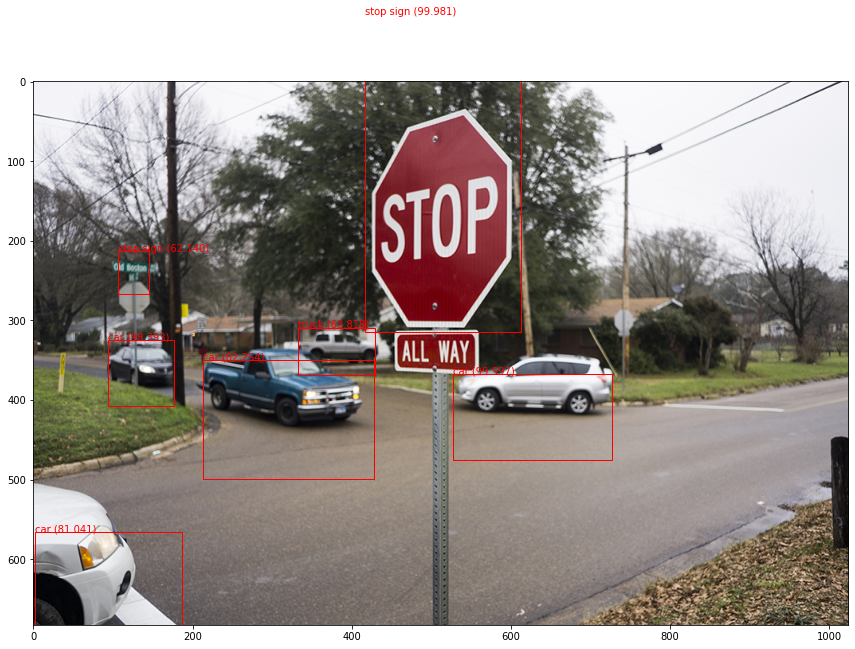

In [ ]:
draw_boxes(photo_filename2, v_boxes, v_labels, v_scores)

#### Erkenntniss Yolov3 Objekt Klassifizierung

Das trainierte Yolov3 Modell hat unter Verwendung der Gewichte des pretrained Modells ein sehr gutes Ergebnis. Im Beispiel wird ein Bild gewählt mit vielen Überschneidungen und unscharfen Elementen im Hintergrund. 

Selbst in einem Testbild mit vielen Überlagerungen können fast alle abgebildeten Objekte eines Straßenverkehrs mit einer sehr hohen Wahrscheinlichkeit > 97% klassifiziert werden.  Die Bounding Boxes werden jedoch teilweise zu klein oder zu groß, sowie leicht verschoben auf dem Bild dargestellt. Ebenso werden kleine Elemente nur schwer erkannt. Das heißt es wurden von 7 möglichen, erkennbaren Objekten 6 korrekt erkannt. Auch schwieriger zu klassifizierende Bilder, wie seitliche Bilder oder Ausschnitte eines Objektes (siehe Automobil Front) können mit einer hohen Wahrscheinlichkeit richtig durch das Yolov3 Modell klassifziert werden.

In [ ]:
input_w, input_h = 474, 474
photo_filename2 = 'traffic01.jpg'
image, image_w, image_h = load_image_pixels(photo_filename, (net_w, net_w))

yolos = yolov3.predict(image)
print([a.shape for a in yolos])
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]
# define the probability threshold for detected objects
class_threshold = 0.6
boxes = list()

for i in range(len(yolos)):
  # decode the output of the network
  boxes += decode_netout(yolos[i][0], anchors[i], obj_thresh,  net_h, net_w)

correct_yolo_boxes(boxes, image_h, image_w, net_h, net_w)
do_nms(boxes, nms_thresh)
v_boxes, v_labels, v_scores = get_boxes(boxes, labels, class_threshold)
for i in range(len(v_boxes)):
    print(v_labels[i], v_scores[i])

[(1, 13, 13, 255), (1, 26, 26, 255), (1, 52, 52, 255)]
car 82.25365877151489
stop sign 99.98083114624023
car 99.5967447757721
car 81.04075789451599
stop sign 62.140268087387085
truck 63.818174600601196
car 98.39332699775696


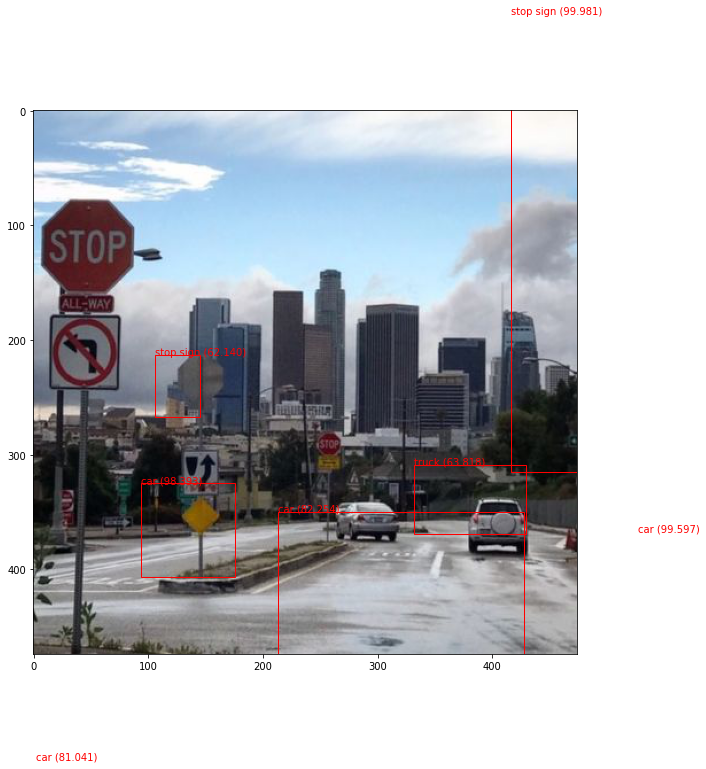

In [ ]:
draw_boxes(photo_filename2, v_boxes, v_labels, v_scores)